<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/answer/07a_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7章 サポートベクトルマシン

## 課題

GridSearchCV でscikit-learn付属の wine データに対する多項式カーネルサポートベクトルマシン(SVC) 識別の最適なハイパーパラメータ(Cとdegree)の組み合わせを求めてください。余裕があれば、多項式カーネル以外にRBFカーネルも探索の対象として最適なパラメータの組み合わせを求めてください。

SVMは2値分類問題に適用可能な識別器なので、多値分類に用いるときは、以下のいずれかの方法をとる必要があります。

* one-versus-rest法 ('ovr')
  * 各クラスについて、そのクラスに属するかどうかを識別するSVMを作る
  * ２つ以上のクラスに属すると判定された場合は識別面からの距離が大きいものに分類する
* ペアワイズ法 ('ovo')
  * クラス対ごとに識別器を作る
  * 判定は多数決を取る

scikit-learnではSVCの引数decision_function_shapeで指定し、デフォルトは 'ovr' です

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

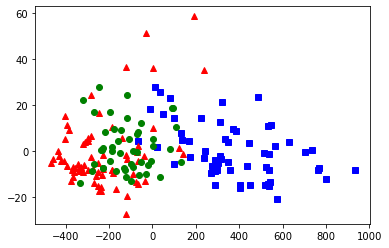

In [3]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1],"bs")
plt.plot(X2[y==1,0], X2[y==1,1],"r^")
plt.plot(X2[y==2,0], X2[y==2,1],"go")

In [4]:
svc = SVC()
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

GridSearchを行います。「スラック変数の重みC」と「カーネルとパラメータの組み合わせ」を2組作って、ディクショナリの配列param\_gridを作成します。

In [5]:
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000, 10000], 'kernel': ['poly'], 'degree': [1,2,3]},
  {'C': [0.1, 1, 10, 100, 1000, 10000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001]},
 ]

識別器のインスタンスを第1引数、グリッドを第2引数として、[GridSearch](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)のインスタンスを作成し、fitメソッドを実行します。パラメータcvの値がNone（デフォルト）のとき、性能は3-fold CVで評価されます。

In [6]:
clf = GridSearchCV(svc, param_grid, cv=5, iid=False, return_train_score=True)
clf.fit(X, y)                            

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000, 10000],
                          'degree': [1, 2, 3], 'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000, 10000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

すべてのパラメータの組み合わせについて、スコアを表示します。

In [7]:
re = clf.cv_results_
for params, mean_score, std_score in zip(re['params'], re['mean_test_score'], re['std_test_score']):
    print("{:.3f} (+/- {:.3f}) for {}".format(mean_score, std_score*2, params))

0.658 (+/- 0.103) for {'C': 0.1, 'degree': 1, 'kernel': 'poly'}
0.652 (+/- 0.114) for {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
0.646 (+/- 0.113) for {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
0.663 (+/- 0.088) for {'C': 1, 'degree': 1, 'kernel': 'poly'}
0.652 (+/- 0.097) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.652 (+/- 0.103) for {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.703 (+/- 0.124) for {'C': 10, 'degree': 1, 'kernel': 'poly'}
0.669 (+/- 0.122) for {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.680 (+/- 0.085) for {'C': 10, 'degree': 3, 'kernel': 'poly'}
0.748 (+/- 0.141) for {'C': 100, 'degree': 1, 'kernel': 'poly'}
0.720 (+/- 0.140) for {'C': 100, 'degree': 2, 'kernel': 'poly'}
0.714 (+/- 0.085) for {'C': 100, 'degree': 3, 'kernel': 'poly'}
0.849 (+/- 0.142) for {'C': 1000, 'degree': 1, 'kernel': 'poly'}
0.821 (+/- 0.190) for {'C': 1000, 'degree': 2, 'kernel': 'poly'}
0.787 (+/- 0.161) for {'C': 1000, 'degree': 3, 'kernel': 'poly'}
0.950 (+/- 0.065) for {'C': 10000, 'degree': 1

性能が最大となるパラメータとそのときのスコアを表示します。

In [8]:
clf.best_params_

{'C': 10000, 'degree': 1, 'kernel': 'poly'}

In [9]:
clf.best_score_

0.9498412698412698

Xを2次元データとして、識別面のおおまかなイメージを確認します。

In [10]:
svc2 = SVC(kernel='poly', degree=1, C=10000)

In [11]:
svc2.fit(X2, y)

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

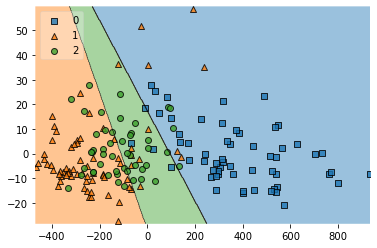

In [12]:
plot_decision_regions(X=X2, y=y, clf=svc2, legend=2)